# Web Scraping with Beautiful Soup and Pandas

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# For web scraping
import requests
import urllib.request
from bs4 import BeautifulSoup

# For performing regex operations
import re

In [46]:
# Web Scrapping Amazon best selling Xbox Games
no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.com/Best-Sellers-Video-Games-Xbox-One/zgbs/videogames/6469296011/ref=zg_bs_nav_vg_2_6469269011'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        publisher = d.find('span', attrs={'class':'a-size-small a-color-base'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")
            
        if publisher is not None:
            #print(publisher.text)
            all1.append(publisher.text)
        else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [47]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Video Game Name','Publisher','Rating','Customers_Rated', 'Price'])
df.to_csv('amazon_Xbox_games.csv', index=False, encoding='utf-8')

In [194]:
df = pd.read_csv('amazon_Xbox_games.csv')

In [195]:
df.shape

(100, 5)

In [196]:
df

,Video Game Name,Publisher,Rating,Customers_Rated,Price
0,Call of Duty: Black Ops Cold War Standard Edit...,ACTIVISION,4.6 out of 5 stars,"4,055",$30.00
1,NBA 2K21 - Xbox One,2K,4.7 out of 5 stars,"4,179",$12.99
2,Madden NFL 22 - Xbox One,Electronic Arts,-1,0,$59.99
3,Titanfall 2: Ultimate Edition - Xbox One [Digi...,Electronic Arts,4.7 out of 5 stars,515,$2.99
4,Grand Theft Auto V Xbox One,Rockstar Games,4.7 out of 5 stars,"9,609",$21.75
...,...,...,...,...,...
95,Star Wars Battlefront II - Xbox One,Electronic Arts,4.6 out of 5 stars,"1,231",$19.50
96,Call Of Duty: Ghosts /xbox One,ACTIVISION,4.6 out of 5 stars,"1,195",$20.01
97,Kingdom Hearts III - Xbox One,Square Enix,4.6 out of 5 stars,"2,194",$9.99
98,WWE 2K19 - Xbox One,2K,4.6 out of 5 stars,"1,040",$28.02


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Video Game Name  100 non-null    object
 1   Publisher        100 non-null    object
 2   Rating           100 non-null    object
 3   Customers_Rated  100 non-null    object
 4   Price            100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [198]:
# lets clean the dataframe

In [199]:
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])

In [200]:
df['Rating'] = pd.to_numeric(df['Rating'])
df["Price"] = df["Price"].str.replace('$', '')
df["Price"] = df["Price"].str.replace(',', '')


In [201]:
df

,Video Game Name,Publisher,Rating,Customers_Rated,Price
0,Call of Duty: Black Ops Cold War Standard Edit...,ACTIVISION,4.6,"4,055",30.00
1,NBA 2K21 - Xbox One,2K,4.7,"4,179",12.99
2,Madden NFL 22 - Xbox One,Electronic Arts,-1.0,0,59.99
3,Titanfall 2: Ultimate Edition - Xbox One [Digi...,Electronic Arts,4.7,515,2.99
4,Grand Theft Auto V Xbox One,Rockstar Games,4.7,"9,609",21.75
...,...,...,...,...,...
95,Star Wars Battlefront II - Xbox One,Electronic Arts,4.6,"1,231",19.50
96,Call Of Duty: Ghosts /xbox One,ACTIVISION,4.6,"1,195",20.01
97,Kingdom Hearts III - Xbox One,Square Enix,4.6,"2,194",9.99
98,WWE 2K19 - Xbox One,2K,4.6,"1,040",28.02


In [202]:
df['Price'] = df['Price'].astype('float')
df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '')


In [203]:

df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Video Game Name  100 non-null    object 
 1   Publisher        100 non-null    object 
 2   Rating           100 non-null    float64
 3   Customers_Rated  100 non-null    int64  
 4   Price            100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [204]:
# Replace zeros to NaN. 
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)
df.isnull().sum()

Video Game Name    0
Publisher          2
Rating             0
Customers_Rated    6
Price              2
dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Video Game Name  100 non-null    object 
 1   Publisher        98 non-null     object 
 2   Rating           100 non-null    float64
 3   Customers_Rated  94 non-null     float64
 4   Price            98 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.0+ KB


In [206]:
df[df['Customers_Rated'].isna()]

,Video Game Name,Publisher,Rating,Customers_Rated,Price
2,Madden NFL 22 - Xbox One,Electronic Arts,-1.0,NaN,59.99
24,NBA 2K22 - Xbox One,2K,-1.0,NaN,59.99
33,Halo Infinite - Xbox Series X Standard Edition,Microsoft,-1.0,NaN,59.99
48,Battlefield 2042 - Xbox One,Electronic Arts,-1.0,NaN,59.99
61,NBA 2K22 75th Anniversary Edition - Xbox One,2K,-1.0,NaN,99.99
94,FIFA 22 - Xbox One,Electronic Arts,-1.0,NaN,59.99


In [207]:
# these are all games that have yet to come out with. I think it is best to neglect these games for our analysis
df.dropna(how='any', subset=['Customers_Rated'], inplace=True)

df.isna().sum()

Video Game Name    0
Publisher          2
Rating             0
Customers_Rated    0
Price              2
dtype: int64

In [208]:
# Let's look at the price NaN
df[df['Price'].isna()]

,Video Game Name,Publisher,Rating,Customers_Rated,Price
57,WWE 2K20: Standard - [Xbox One Digital Code],2K,4.3,110.0,NaN
63,WWE 2K20: Deluxe Edition - [Xbox One Digital C...,2K,4.0,176.0,NaN


In [209]:
df.reset_index(drop=True, inplace=True)
# Let's look at the price NaN
df[df['Price'].isna()]

,Video Game Name,Publisher,Rating,Customers_Rated,Price
53,WWE 2K20: Standard - [Xbox One Digital Code],2K,4.3,110.0,NaN
58,WWE 2K20: Deluxe Edition - [Xbox One Digital C...,2K,4.0,176.0,NaN


In [210]:
df.dropna(how='any', subset=['Price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [211]:
#oops it looks like customers rated column is now a float
df['Customers_Rated'].astype('int')

0     4055
1     4179
2      515
3     9609
4      153
      ... 
87    1231
88    1195
89    2194
90    1040
91     698
Name: Customers_Rated, Length: 92, dtype: int32

In [212]:
data = df[df['Customers_Rated'] > 1000]
data = data.sort_values(['Rating'],axis=0, ascending=False)[:15]


In [213]:
data

,Video Game Name,Publisher,Rating,Customers_Rated,Price
46,Fallout 4 Game of The Year Edition - Xbox One,Bethesda,4.8,1461.0,19.99
5,"Assassin’s Creed Valhalla Xbox Series X|S, Xbo...",Ubisoft,4.8,6519.0,36.31
57,BioShock: The Collection - Xbox One,2K,4.8,1871.0,19.99
9,The Elder Scrolls V: Skyrim Special Edition - ...,Bethesda,4.8,3597.0,15.50
11,Red Dead Redemption 2 (XBox One),Rockstar Games,4.8,7345.0,36.75
24,NHL 21 - Xbox One,Electronic Arts,4.8,1323.0,15.99
50,LEGO DC Super-Villains - Xbox One,WB Games,4.7,2461.0,19.99
78,Lego Marvel Collection - Xbox One,WB Games,4.7,2349.0,13.80
77,Immortals Fenyx Rising - Xbox One Standard Edi...,Ubisoft,4.7,1199.0,24.88
76,Naruto Shippuden: Ultimate Ninja Storm 4 - Xbo...,BANDAI NAMCO Entertainment,4.7,1118.0,18.93


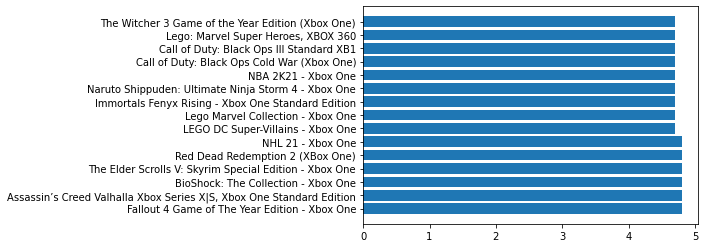

In [219]:
plt.figure()
plt.barh(data['Video Game Name'], data['Rating'])
plt.show()

In [231]:
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Legend
output_notebook()

Loading BokehJS ...

In [232]:
from bokeh.models import Legend
from bokeh.palettes import Dark2_5 as palette
import itertools
from bokeh.palettes import d3
#colors has a list of colors which can be used in plots
colors = itertools.cycle(palette)

palette = d3['Category20'][20]

In [233]:
data = df.sort_values(["Customers_Rated"], axis=0, ascending=False)[:20]
index_cmap = factor_cmap('Publisher', palette=palette,
                         factors=data["Publisher"])

In [237]:
data

,Video Game Name,Publisher,Rating,Customers_Rated,Price
10,Cyberpunk 2077 - Xbox One,WB Games,4.1,9747.0,28.00
3,Grand Theft Auto V Xbox One,Rockstar Games,4.7,9609.0,21.75
53,FIFA 21 (Xbox One),Electronic Arts,4.7,9210.0,17.98
11,Red Dead Redemption 2 (XBox One),Rockstar Games,4.8,7345.0,36.75
81,NBA 2K20 Xbox One,2K,4.7,7115.0,9.49
15,Madden NFL 21 – Xbox One & Xbox Series X,Electronic Arts,4.7,6908.0,15.00
5,"Assassin’s Creed Valhalla Xbox Series X|S, Xbo...",Ubisoft,4.8,6519.0,36.31
29,Call of Duty: Modern Warfare - Xbox One,ACTIVISION,4.7,6199.0,49.30
30,Forza Horizon 4 Standard Edition – Xbox One,Microsoft,4.7,4419.0,39.30
56,Star Wars Jedi: Fallen Order (Xbox One),Electronic Arts,4.7,4403.0,27.99


In [234]:
plt = figure(plot_width=700, plot_height=700, title = "Top Publisher: Rating vs. Customers Rated")
plt.scatter('Rating','Customers_Rated',source=data,fill_alpha=0.6, fill_color=index_cmap,size=20,legend='Publisher')
plt.xaxis.axis_label = 'RATING'
plt.yaxis.axis_label = 'CUSTOMERS RATED'
plt.legend.location = 'top_left'

In [236]:
show(plt)

In [ ]:
# Rockstar games appears to be a big  inner in Terms of Rating and number of reviews